# Introduction:

### The COVID-19 pandemic, caused by the novel coronavirus SARS-CoV-2, has reshaped our world in unprecedented ways. Early detection of COVID-19 cases is paramount for several reasons. First and foremost, it allows for timely isolation and treatment of infected individuals, reducing the risk of further transmission. Early intervention can also help prevent overwhelming the healthcare system, ensuring that those in need of medical care receive prompt attention. Moreover, the ability to identify and trace cases early is essential for contact tracing and the implementation of public health measures to curtail the spread of the virus. To address the urgency of early detection and its potential lifesaving impact, we have undertaken a machine learning project focused on predicting COVID-19 positivity. Our aim is to develop a predictive model that can assist in identifying individuals who may have contracted the virus.


# Problem Statement

### The outbreak of the COVID-19 pandemic has placed an enormous strain on healthcare systems and society at large. The need for efficient testing and early detection of the virus has never been more critical. This project aims to address the following problem:

## Problem:
### Develop a predictive model to identify individuals who may be COVID-19 positive, with a focus on early detection and the ability to guide timely intervention and public health measures.

## Background:
### The COVID-19 virus is highly contagious and can spread rapidly through communities. Timely detection of infected individuals is crucial in preventing further transmission and ensuring that those in need of medical care receive prompt attention. Existing testing and contact tracing methods have limitations, and the demand for testing often exceeds available resources. Additionally, infected individuals can be asymptomatic or presymptomatic, making it challenging to identify cases solely based on symptoms.

## Importance:
### An accurate and early detection model has the potential to revolutionize our approach to combating COVID-19. It can assist in identifying individuals at risk even before symptoms appear or test results are available, thereby reducing the risk of transmission, optimizing healthcare resources, and supporting public health measures. Such a model could be invaluable in the fight against the pandemic.

## Objective:
### The primary objective of this project is to build a machine learning model that can predict the likelihood of an individual being COVID-19 positive based on a set of relevant features. The model should be capable of making predictions using readily available data, such as demographic information, recent travel history, and potential exposure risks. The goal is to provide a tool that complements existing testing and contact tracing efforts and aids in the early detection and intervention for COVID-19 cases.

### In this project, we will explore the development, training, and evaluation of machine learning models to achieve the stated objective. We will also assess the model's performance, address potential challenges, and consider ethical and privacy considerations in the context of public health.


# Hypotheses

1. Hypothesis 1 (Main Hypothesis)**: Machine learning models can accurately predict COVID-19 positivity based on symptoms providing a valuable tool for early detection and intervention.

2. **Hypothesis 2**:factors such as age, gender, Haedache, shortness of breath and sore throat information play a significant role in the prediction of COVID-19 positivity.


3. **Hypothesis 3**: Machine learning models will be more accurate in predicting COVID-19 positivity for presymptomatic or asymptomatic individuals compared to those already exhibiting symptoms. Early detection is a key strength of the model.


4. **Hypothesis 7**: Privacy and ethical considerations are essential in the development and deployment of the model. Striking a balance between public health benefits and individual privacy is a critical aspect of this project.

These hypotheses guide our investigation and the development of our machine learning models. We will test these hypotheses through data analysis, model development, and evaluation, and assess their validity in the context of predicting COVID-19 positivity.

# Now Let's start by importing some important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

# Prepare Data

In [3]:
df= pd.read_csv("corona_tested_006.csv")
df.head()

C:\Users\MUKESH RAR\AppData\Local\Temp\ipykernel_3328\2456390586.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("corona_tested_006.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [3]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

Let's check overall data size

In [4]:
len(df)

278848

Here let's look into columns and thier data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


Let's check about null values in our data


In [6]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

We can see that there are some records that contains null values, so let's further investigate it

In [4]:
for column in df.columns:
  unique_values= df[column].nunique()
  values= df[column].unique()
  print(f"{column} has {unique_values} values: {values}")

Ind_ID has 278848 values: [     1      2      3 ... 278846 278847 278848]
Test_date has 51 values: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms has 2 values: [True False nan]
Fever has 2 values: [False True nan]
Sore_throat has 2 values: [True False nan]
Shortness_of_breath has 2 values: [False True nan]
Headache has 2 values: [False True nan]
Corona ha

Let's replace nan values with mode value of respective variable

In [5]:
for column in df.columns:
  df[column]= df[column].fillna(df[column].mode()[0])
  df[column]= df[column].replace('None', df[column].mode()[0])


In [6]:
for column in df.columns:
  unique_values= df[column].nunique()
  values= df[column].unique()
  print(f"{column} has {unique_values} values: {values}")

Ind_ID has 278848 values: [     1      2      3 ... 278846 278847 278848]
Test_date has 51 values: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms has 2 values: [ True False]
Fever has 2 values: [False  True]
Sore_throat has 2 values: [ True False]
Shortness_of_breath has 2 values: [False  True]
Headache has 2 values: [False  True]
Corona has 3 values: ['n

variable Corona has 3 values: ['negative' 'positive' 'other'], but ther is no 'other' type patient is possible , it can be either positive or negative, so let's fill this also with mode values

In [7]:
df['Corona']=df['Corona'].replace('other', df['Corona'].mode()[0])

In [8]:
for column in df.columns:
  unique_values= df[column].nunique()
  values= df[column].unique()
  print(f"{column} has {unique_values} values: {values}")

Ind_ID has 278848 values: [     1      2      3 ... 278846 278847 278848]
Test_date has 51 values: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms has 2 values: [ True False]
Fever has 2 values: [False  True]
Sore_throat has 2 values: [ True False]
Shortness_of_breath has 2 values: [False  True]
Headache has 2 values: [False  True]
Corona has 2 values: ['n

Now our data is clean and we can proceed futher with eda..

### Now let's check feature importmace of each variable with target variable

In [9]:
feature_columns= ["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath", "Headache", 'Age_60_above', "Sex"]
target_column= 'Corona'


for feature in feature_columns:
  contingency_table= pd.crosstab(df[feature], df[target_column])

  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(f"{feature} - Chi-squared: {chi2}, p-value: {p}")

  if p < 0.05:  # Set your significance level (alpha)
    print(f"{feature} is likely dependent on the target.")
  else:
    print(f"{feature} is likely independent of the target.")

  print()

Cough_symptoms - Chi-squared: 10569.415074648161, p-value: 0.0
Cough_symptoms is likely dependent on the target.

Fever - Chi-squared: 19378.570935486066, p-value: 0.0
Fever is likely dependent on the target.

Sore_throat - Chi-squared: 21183.30774235602, p-value: 0.0
Sore_throat is likely dependent on the target.

Shortness_of_breath - Chi-squared: 14873.153774171122, p-value: 0.0
Shortness_of_breath is likely dependent on the target.

Headache - Chi-squared: 37078.834270861014, p-value: 0.0
Headache is likely dependent on the target.

Age_60_above - Chi-squared: 600.9907438227524, p-value: 1.0193061909600926e-132
Age_60_above is likely dependent on the target.

Sex - Chi-squared: 140.41458840695748, p-value: 2.160497487725928e-32
Sex is likely dependent on the target.



We observed that all the features have p<0.5, so all these columns are important.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  bool  
 3   Fever                278848 non-null  bool  
 4   Sore_throat          278848 non-null  bool  
 5   Shortness_of_breath  278848 non-null  bool  
 6   Headache             278848 non-null  bool  
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: bool(5), int64(1), object(5)
memory usage: 14.1+ MB


Let's convert 'Test_date' to datetime..

In [11]:
df['Test_date'] = pd.to_datetime(df['Test_date'], format='%d-%m-%Y')

Let's save our cleaned data to a csv file

In [12]:
df.to_csv('cleaned.csv')

#### Let's do one-hot encoding to convert some categorical data into binary variables

In [13]:
df = pd.get_dummies(df, columns=['Age_60_above', 'Sex', 'Corona'], drop_first=True)
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact,Age_60_above_Yes,Sex_male,Corona_positive
0,1,2020-03-11,True,False,True,False,False,Abroad,False,False,False
1,2,2020-03-11,False,True,False,False,False,Abroad,False,False,True
2,3,2020-03-11,False,True,False,False,False,Abroad,False,False,True
3,4,2020-03-11,True,False,False,False,False,Abroad,False,False,False
4,5,2020-03-11,True,False,False,False,False,Contact with confirmed,False,False,False


Now we are good to go, before that let's check class balance in our data..

<Axes: title={'center': 'Class Balance'}, xlabel='Class', ylabel='relative freq.'>

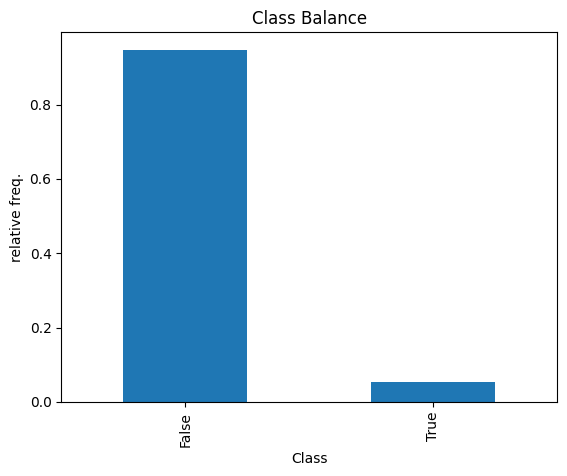

In [14]:
# Plot value counts of `"Corona_positive"`
df["Corona_positive"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Class",
    ylabel="relative freq.",
    title= "Class Balance"
)

This shows that our data is highly imbalanced, so let's do oversampling/undersampling after spliting the data..

## Split

In [15]:
threshold_date = pd.to_datetime('2020-04-15')
# Split the DataFrame into X_train and X_test based on 'Test_date'
X_train = df[df['Test_date'] <= threshold_date].drop(columns='Corona_positive')
X_test = df[df['Test_date'] > threshold_date].drop(columns='Corona_positive')
y_train= df['Corona_positive'][df['Test_date'] <= threshold_date]
y_test= df['Corona_positive'][df['Test_date'] >threshold_date]

In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (163189, 10)
y_train shape: (163189,)
X_test shape: (115659, 10)
y_test shape: (115659,)


In [17]:
len(df)== len(X_train)+ len(X_test)
len(df)==len(y_train)+len(y_test)

True

1. Here 'Ind_ID' is working as a serial number, so we can drop it becuase it is not making any impact on our data.

2. Also There is a 'Test_date' column which is showing the testing date and It's not making any significant impact in our analysis, so we will drop it as well.

3. Known_contact is containing a lot of 'None' values and it's also not that important, so we will drop it as well.

In [18]:
X_train= X_train.drop(columns=['Ind_ID', 'Test_date', 'Known_contact']).astype(int)
X_test= X_test.drop(columns=['Ind_ID', 'Test_date', 'Known_contact']).astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

Let's do undersampling...

In [19]:
from imblearn.under_sampling import RandomUnderSampler

rus= RandomUnderSampler(random_state=True, replacement=True)

X_train_under, y_train_under= rus.fit_resample(X_train, y_train)

<Axes: title={'center': 'Class Balance'}, xlabel='Class', ylabel='relative freq.'>

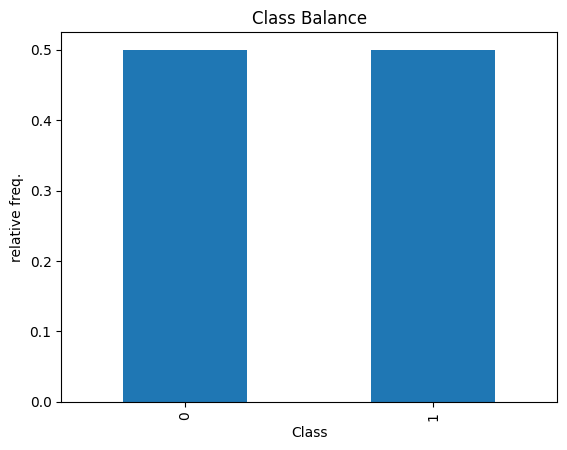

In [20]:
y_train_under.value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Class",
    ylabel="relative freq.",
    title= "Class Balance"
)

Now, we have balanced data..

# Build

### Baseline:

Baseline model is a dumb model which will help us to evaluate that our model is getting trained in right way, after building a model.

In [24]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.93


### Iterate

In [25]:
models= {
    "Logistic Regression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=True),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGB": xgb.XGBClassifier(),
    "SVC": SVC()
}

In [26]:
for name, model in models.items():
    model.fit(X_train_under, y_train_under)
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)

    print(name)
    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Logistic Regression
Training Accuracy: 0.8582
Test Accuracy: 0.8929
DecisionTreeClassifier
Training Accuracy: 0.8184
Test Accuracy: 0.8633
RandomForestClassifier
Training Accuracy: 0.8184
Test Accuracy: 0.8633
XGB
Training Accuracy: 0.8184
Test Accuracy: 0.8633
SVC
Training Accuracy: 0.8184
Test Accuracy: 0.8633


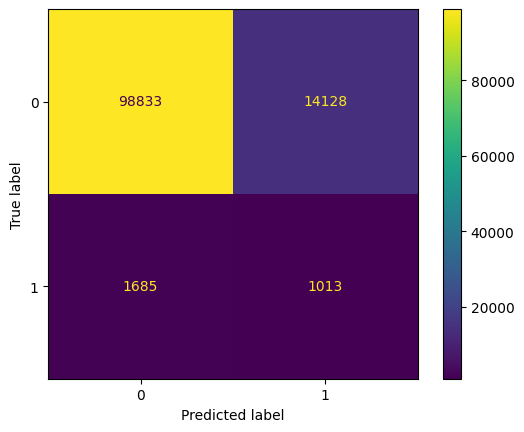

In [27]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

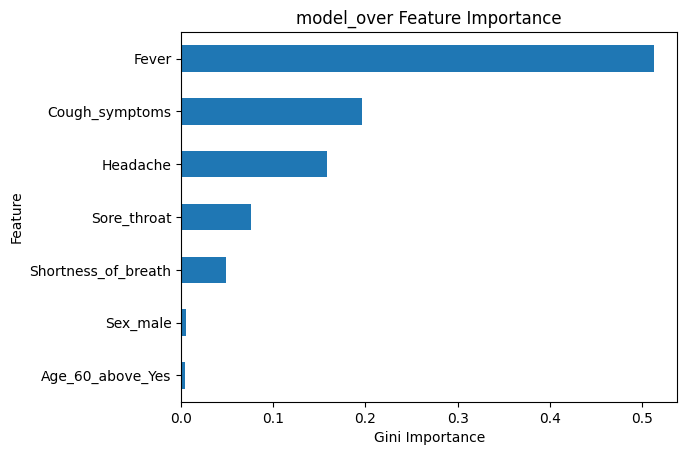

In [28]:
# Get importances
importances= models["DecisionTreeClassifier"].feature_importances_
# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_under.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

### Let's do parameter tuning to see if we can improve accuracy of this model: 

LogisticRegression:

In [29]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['lbfgs']  # Optimization algorithm
}

model_l = LogisticRegression()

grid_search = GridSearchCV(model_l, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_under, y_train_under)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


y_pred= grid_search.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("=" * 50)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8929006821777813
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94    112961
           1       0.07      0.28      0.11      2698

    accuracy                           0.89    115659
   macro avg       0.52      0.59      0.53    115659
weighted avg       0.96      0.89      0.92    115659



DecisionTreeClassifier:

In [30]:
params = {
    "max_depth":range(10,50,10)
}

model_d = DecisionTreeClassifier()

grid_search = GridSearchCV(model_d, param_grid= params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_under, y_train_under)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



y_pred= grid_search.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("=" * 50)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'max_depth': 10}
Accuracy: 0.863279122247296
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.93    112961
           1       0.07      0.38      0.11      2698

    accuracy                           0.86    115659
   macro avg       0.53      0.63      0.52    115659
weighted avg       0.96      0.86      0.91    115659



RandomForests

In [31]:
params = {
    "n_estimators":range(25,100,25),
    "max_depth":range(10,50,10)
}

model_r = RandomForestClassifier()

grid_search = GridSearchCV(model_r, param_grid= params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_under, y_train_under)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


y_pred= grid_search.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("=" * 50)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'max_depth': 40, 'n_estimators': 50}
Accuracy: 0.863279122247296
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.93    112961
           1       0.07      0.38      0.11      2698

    accuracy                           0.86    115659
   macro avg       0.53      0.63      0.52    115659
weighted avg       0.96      0.86      0.91    115659



XgBoost:

In [32]:
param_grid = {
    "n_estimators":range(25,100,25),
    "max_depth":range(10,50,10)
}

model_x = xgb.XGBClassifier()


grid_search = GridSearchCV(model_x, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_under, y_train_under)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


y_pred= grid_search.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("=" * 50)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 25}
Accuracy: 0.863279122247296
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.93    112961
           1       0.07      0.38      0.11      2698

    accuracy                           0.86    115659
   macro avg       0.53      0.63      0.52    115659
weighted avg       0.96      0.86      0.91    115659



### SVC:

In [22]:
# Create an SVC classifier
model_s = SVC()


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(model_s, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_under, y_train_under) 

y_pred= grid.predict(X_test)
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

# Calculate accuracy and print the results

accuracy= accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("=" * 50)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.812 total time=47.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=  11.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=  10.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=  10.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=  10.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=  13.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.795 total time=  13.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time=  13.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.733 total time=  12.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.654 total time=  11.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.802 total time=  16.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

# Conclusion

The SVC model achieved a test accuracy of 0.9276, which is the highest among the models and almost near to baseline accuracy. This suggests that the SVC model performed the best in terms of classifying the test data.

# SQL

In [ ]:
data= pd.read_csv("cleaned.csv", index_col= 'Ind_ID')
data.drop(columns='Unnamed: 0', axis= 0, inplace=True)
data.head()

In [ ]:
data["Test_date"]= pd.to_datetime(data["Test_date"])

In [ ]:
import duckdb
conn= duckdb.connect()
conn.register('data', data)


1. Find the number of corona patients who faced shortness of breath.

In [ ]:
conn.execute("select count(*) from data where Shortness_of_breath=True").fetchdf()

2. Find the number of negative corona patients who have fever and sore_throat. 

In [ ]:
conn.execute("select count(*) from data where Corona='negative' and Fever=True and Sore_throat=True").fetchdf()

3. Group the data by month and rank the number of positive cases.

In [ ]:
conn.execute("select strftime(data['Test_date'], '%m') as month, count(case when Corona='positive' then 1 else 0 end) as postive_cases, dense_rank() over(order by count(case when Corona='positive' then 1 else 0 end)) as rank from data group by month").fetchdf()

4. Find the female negative corona patients who faced cough and headache.

In [ ]:
conn.execute("select * from data where Sex= 'female' and Corona='negative' and Cough_symptoms=True and Headache=True").fetchdf()

5. How many elderly corona patients have faced breathing problems?

In [ ]:
conn.execute("select count(*) from data where Shortness_of_breath=True and Age_60_above='Yes'").fetchdf()

In [ ]:
data[["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath", "Headache"]]= data[["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath", "Headache"]].astype(int);

6. Which three symptoms were more common among COVID positive patients?

In [ ]:
query= """SELECT Symptom, SymptomCount AS Most_Common_Symptom FROM (
    SELECT
        'Cough_symptoms' AS Symptom, COUNT(case Cough_symptoms when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'positive'
    UNION ALL
    SELECT
        'Fever' AS Symptom, COUNT(case Fever when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'positive'
    UNION ALL
    SELECT
        'Sore_throat' AS Symptom, COUNT(case Sore_throat when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'positive'
    UNION ALL
    SELECT
        'Shortness_of_breath' AS Symptom, COUNT(case Shortness_of_breath when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'positive'
    UNION ALL
    SELECT
        'Headache' AS Symptom, SUM(case Headache when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'positive'
) order by SymptomCount desc limit 3
"""

conn.execute(query).fetchdf()

7. Which symptom was less common among COVID negative people?

In [ ]:
query= """SELECT Symptom, SymptomCount AS Most_Common_Symptom FROM (
    SELECT
        'Cough_symptoms' AS Symptom, COUNT(case Cough_symptoms when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'negative'
    UNION ALL
    SELECT
        'Fever' AS Symptom, COUNT(case Fever when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'negative'
    UNION ALL
    SELECT
        'Sore_throat' AS Symptom, COUNT(case Sore_throat when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'negative'
    UNION ALL
    SELECT
        'Shortness_of_breath' AS Symptom, COUNT(case Shortness_of_breath when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'negative'
    UNION ALL
    SELECT
        'Headache' AS Symptom, SUM(case Headache when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'negative'
) order by SymptomCount asc limit 3
"""

conn.execute(query).fetchdf()


8. What are the most common symptoms among COVID positive males whose known contact was abroad? 

In [ ]:
query= """SELECT Symptom, SymptomCount AS Most_Common_Symptom FROM (
    SELECT
        'Cough_symptoms' AS Symptom, COUNT(case Cough_symptoms when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'positive' AND Known_contact = 'Abroad' AND Sex='female'
    UNION ALL
    SELECT
        'Fever' AS Symptom, COUNT(case Fever when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'positive' AND Known_contact = 'Abroad' AND Sex='female'
    UNION ALL
    SELECT
        'Sore_throat' AS Symptom, COUNT(case Sore_throat when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'positive' AND Known_contact = 'Abroad' AND Sex='female'
    UNION ALL
    SELECT
        'Shortness_of_breath' AS Symptom, COUNT(case Shortness_of_breath when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'positive' AND Known_contact = 'Abroad' AND Sex='female'
    UNION ALL
    SELECT
        'Headache' AS Symptom, SUM(case Headache when 1 then 1 else 0 end) AS SymptomCount FROM data WHERE Corona = 'positive' AND Known_contact = 'Abroad' AND Sex='female'
) order by SymptomCount desc limit 3
"""

conn.execute(query).fetchdf()